## Reproduction of Last Entry

In [345]:
#Data: what is the data to be included in the table?
#Source: where is the data being collected from?
#Formula: how is the data being processed?

In [346]:
%%html
<style>
table { float: left }
</style>

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime
import time
import pytz
import dateutil
from dateutil import relativedelta

sns.set(color_codes=True)

In [348]:
# Database connection credentials

user = "postgres"
password = "200323201"
host = "localhost"
port = "5432"
database = "heroku-timesheet"

In [349]:
db_string = "postgresql://{user}:{password}@{host}:{port}/{database}".format(user=user, 
                                                                             password=password,
                                                                             host=host,
                                                                             port=port,
                                                                             database=database)

| data | source | formula | remarks |
| ----------------- | ------------------------- | ------- | - |
| person_name       | timesheet.person_name     | groupby |   |
| account_name      | timesheet.account_name    | groupby |   |
| latest_entry      | timesheet.stop_datetime   | max     |   |

In [350]:
from sqlalchemy import create_engine
engine = create_engine(db_string)
con = engine.connect()

In [351]:
query = """
    SELECT model.timesheet.person_name,
           model.timesheet.account_name,
           model.timesheet.stop_datetime
    FROM model.timesheet
        """

In [352]:
timesheet = pd.read_sql(query, con)

In [353]:
now = pytz.UTC.localize(datetime.datetime.utcnow())

In [354]:
timesheet['since'] = (now - timesheet['stop_datetime']).apply(lambda x: round(x.total_seconds()/3600/24))

In [355]:
timesheet.head()

,person_name,account_name,stop_datetime,since
0,Théophile Sandoz,AKQA,2017-09-20 12:00:00+00:00,229
1,Théophile Sandoz,AKQA,2017-09-21 12:00:00+00:00,228
2,Théophile Sandoz,AKQA,2017-09-22 12:00:00+00:00,227
3,Théophile Sandoz,AKQA,2017-09-25 12:00:00+00:00,224
4,Théophile Sandoz,AKQA,2017-09-26 12:00:00+00:00,223


In [356]:
timesheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093 entries, 0 to 4092
Data columns (total 4 columns):
person_name      4093 non-null object
account_name     4093 non-null object
stop_datetime    4093 non-null datetime64[ns, UTC]
since            4093 non-null int64
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 128.0+ KB


In [366]:
print(timesheet['account_name'].unique(), timesheet['person_name'].unique())

['AKQA' 'Asiahub' 'Atlas' 'LVMH' 'CollabCentral' 'DLG' 'EIC' 'GoodForYou'
 'IT Consultis' 'Kipitapp' 'Scry.info' 'Skycoin' 'UMass' 'UTSEUS' 'VML'
 'Weflex' 'YeDian' 'iPort' 'Coderbunker Internal'] ['Théophile Sandoz' 'Ricky Ng-Adam' 'Yangyang Xu' 'Joe Beltrami'
 'Frederic Bazin' 'Julie Li' 'Echo Ding' 'Gaurav Pahwa' 'Chun Zhang'
 'Alex Miller' 'Ruud Peters' 'David Yu' 'Rick Valenzuela'
 'Lukas Helebrandt' 'Nelson Zhang' 'Miguel Fernandez' 'Charles Umemoto'
 'Ilya Mochalov' 'Natalie Zimyatova' 'Stéphane Vernède' 'Karl Xu'
 'Shuyu Wu' 'Owen Zheng' 'Alberto Galán' 'Caroline Bon' 'Joseph Tsindos'
 'Thimo Visser' 'James Huajun Li' 'Abhishek Kumar' 'Gregory Orton'
 'Dmitry Kazakov' 'Gunnar Wagner' 'Eva Chen' 'Chan Ka Lung'
 'Mohammed BEN-THAIER' 'Eduardo Alarcon' 'Zhang Xiaochen' 'Todd Tang'
 'Christine Liu' 'Minyang Wang' 'Dora ZHANG' 'Douglas Wright'
 'Julien Choulet' 'Ross Cournoyer' 'John Madeley Evers' 'Margot Brulard'
 'Jesse Xu' 'Muhammad Hassan Qureshi' 'Qiong Zhang' 'Pony Ma'
 'Vict

In [367]:
active_project = ['LVMH', 'Coderbunker Internal', 'Atlas', 'Scry.info', 'DLG', 'Skycoin', 'Kipitapp', 'UMass', 'iPort']
active_freelancer = ['Abhishek Kumar', 'Alex Miller', 'Caroline Bon', 'Chan Ka Lung', 'Charles Umemoto', 'Chun Zhang',
                     'David Yu', 'Echo Ding', 'Eduardo Alarcon', 'Frederic Bazin', 'Gregory Orton', 'Joe Beltrami',
                     'John Madeley Evers', 'Karl Xu', 'Lukas Helebrandt', 'Miguel Fernandez', 'Mohammed BEN-THAIER',
                     'Natalie Zimyatova', 'Qiong Zhang', 'Ricky Ng-Adam', 'Ruud Peters']

In [369]:
last_entry_pivot = timesheet.pivot_table(index = 'person_name', 
                                         columns = 'account_name', 
                                         values = 'since', 
                                         aggfunc = min)
last_entry_pivot = last_entry_pivot.filter(items = active_project, axis = 1)
last_entry_pivot = last_entry_pivot.filter(items = active_freelancer, axis = 0)
last_entry_pivot

account_name,LVMH,Coderbunker Internal,Atlas,Scry.info,DLG,Skycoin,Kipitapp,UMass,iPort
person_name,,,,,,,,,
Abhishek Kumar,NaN,NaN,NaN,34.0,NaN,100.0,33.0,NaN,NaN
Alex Miller,24.0,250.0,25.0,29.0,NaN,NaN,NaN,NaN,NaN
Caroline Bon,NaN,23.0,NaN,NaN,26.0,NaN,NaN,NaN,NaN
Chan Ka Lung,NaN,38.0,NaN,88.0,NaN,NaN,NaN,46.0,NaN
Charles Umemoto,NaN,88.0,25.0,24.0,42.0,NaN,NaN,NaN,NaN
Chun Zhang,NaN,40.0,143.0,NaN,26.0,NaN,85.0,NaN,NaN
David Yu,24.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN
Echo Ding,NaN,198.0,119.0,129.0,210.0,54.0,NaN,NaN,54.0
Eduardo Alarcon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN


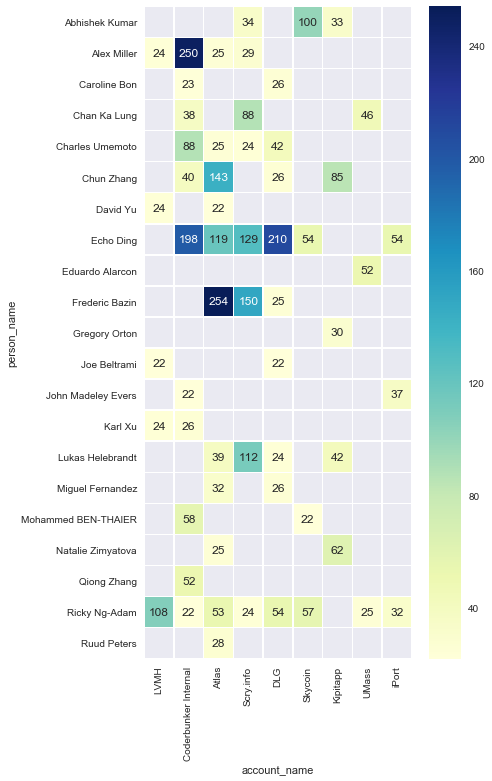

In [373]:
plt.figure(figsize = (6,12))
ax = sns.heatmap(last_entry_pivot, annot=True, fmt='.0f', linewidths=.5, cmap="YlGnBu")